# Modele simple

dummy model se traduit par "modèle bête"

Première étape : clean data

In [ ]:
import pandas as pd
from data_tools import DataTools

tools = DataTools()

df_initial = pd.read_csv("dataset.csv", sep=",", index_col=False)
df_modifie = tools.clean_data(df_initial)
df_modifie.to_csv("clean_dataset.csv", index=False)

Deuxième étape : split data

In [6]:
import sklearn.model_selection as sklms
import numpy as np

df = pd.read_csv("clean_dataset.csv", sep=",", index_col=False)

#data_original = np.array(df, dtype=float)
y = df["charges"]


X_train, X_test, y_train, y_test = sklms.train_test_split(df.drop("charges", axis=1), y, test_size=0.20, random_state=42)

Troisième étape : model choice

In [7]:
import sklearn.linear_model as skllm

clf = skllm.Ridge(alpha=1)
clf.fit(X_train, y_train)


Ridge(alpha=1)

In [18]:
#coeffiscients
for i in range(len(X_train.columns.array)):
    colname = X_train.columns.array[i]
    coeff = clf.coef_[i]
    print(f"{colname} : {coeff}")

age : 256.8428950981352
bmi : 335.86470742808973
children : 425.46879731545954
is_male : -11.128598843329529
is_smoker : 23512.65468901908
is_north : 544.1588422450856
is_west : -265.23893122969315


Quatrième étape : vérification

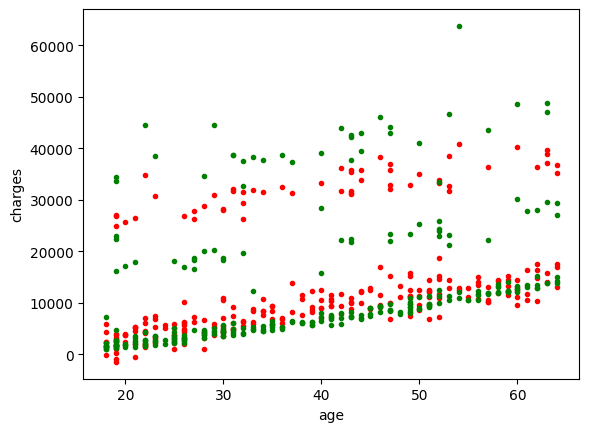

In [10]:
y_predicted = clf.predict(X_test)

import matplotlib.pyplot as plt

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(X_test["age"], y_predicted, "r.")
plt.plot(X_test["age"], y_test, "g.")
plt.show()